In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings('ignore')

- Business Context:

This case study delves into the intricacies of financial products, focusing on the widely recognized term deposit—a mechanism where customers entrust a sum of money to a bank or financial institution, with withdrawals permitted only after a specific period. This arrangement empowers banks to channel funds into higher-yield financial products, enhancing overall profitability. In the dynamic landscape of financial offerings available to the public, term deposits stand out as a key player, providing stability and investment potential for both customers and financial institutions. The core of the term deposit mechanism involves customers depositing a sum of money, which remains inaccessible until a predetermined timeframe elapses. This unique setup enables banks to allocate deposited funds into higher-yield financial instruments, thereby maximizing profitability. In return, customers receive fixed interest based on their deposited amount. This reciprocal arrangement is encapsulated by the Loan Deposit Ratio (LDR), calculated as Total Loans divided by Total Deposits, as outlined in Investopedia (source: https://www.investopedia.com/terms/l/loan-to-deposit-ratio.asp). A higher LDR signifies increased investment capacity for the bank, translating to potential gains. If a bank's deposits are increasing, new money and new clients are being on-boarded. As a result, the bank will likely have more money to lend, which should increase earnings. One effective strategy to attract customers to subscribe to a term deposit involved a well-panned marketing campaigns.

- Problem Statement

A bank marketing campaign serves as a bridge between financial institutions and customers, enabling banks to promote their products and services while providing customers with valuable information, choices, and convenience. When executed effectively, a bank marketing campaign benefits both the bank and its customers by building trust, enhancing financial well-being, and maintaining long-term relationships.

Focusing on the term deposit product, the bank should be able to conduct a marketing campaign targeting the right customers who are likely to make a deposit. In other words, it should minimize the possibility of targeting customers who are not willing to make a deposit while also maintaining relationships with them.

- Goals

Therefore, based on the problem statement above, the bank aims to identify customers who have a higher chance of subscribing to a term deposit and focus marketing efforts on such clients. The bank wants to have the ability to predict which customers are likely to make a deposit and conduct a marketing campaign for those who genuinely want to subscribe to a term deposit. Additionally, the bank aims to identify the most important features in subscribing to deposits. This way, in the future, the bank can focus on those features. Thus, customer divided into two targets class, as follows:

- Target

0: Customers unlikely to subscribe to a term deposit.

1: Customers likely to subscribe to a term deposit.

#### We will build a classification model to help the bank predict whether a customer will subscribe to a term deposit or not.

- Analytical Approach

In classification model, it is crucial to choose the right evaluation metrics. The choice of classification metric depends on the nature of the problem and the specific goals of the classification task. Some common types of classification metrics are accuracy, precision, recall, F1 score, and area under the ROC-AUC.

We will use confusion matrix for evaluating the performance of our classification model. Confusion matrix is widely used because it gives a better idea of a model’s performance. The matrix compares the actual target values with those predicted by the machine learning model. A good model is one which has high TP and TN rates, while low FP and FN rates. 

#### In our case, we want to conduct a marketing campaign accurately for customers who will subscribe a term deposit and keep maintaining a good relationship with all customers.

Type I error: FP (False Positives)

We predict the customers will subscribe term deposit, but in reality, they DON'T. The consequences here is the bank will waste time and money by conducting campaigns for the wrong customers.

Type II error: FN (False Negatives)

We predict the customers will NOT subscribe term deposit, but in reality, they DO. The consequences here is the bank will create a negative impression with customers by not providing them a proper campaign, which can lead to worsening the relationship with customers and a missed opportunity to promote their products.

- Metric Choice

There are several metric choices, the choice is depend on the context of the case and dataset. In here, we want to minimize both of the type error. In type error 1 or FP, the consequences are we will waste time such as acquisition cost and our time to target the wrong customer. While in type 2 error or FN, the impact will be potential of damaging relationship. In addition, our reputation also may depleted since we don't maintain our good relationship. Additional contexts are,
- The data target that we found is imbalance (1 is 12% and 0 is 88%),
- We pay attention more about class 1 or the decision to deposit itself, 
- We want to reduce the type of errors.

Therefore we want to equally minimized both FP and FN type of errors. Based on that statement, we will exclude precision-only metric, recall-only metric, from our choice of metrics because we need them both equally. By then, we also exclude F0.5 and F2 score respectively. Later on we found the data in target column is imbalance (1 is 12% and 0 is 88%), so metric of accuracy will be excluded. Thus, it leaves us to two choices, F1-score metric or ROC-AUC. However, ROC-AUC itself don't necessarily reduce FP and FN, Instead, they are tools for visualizing and evaluating/distinguishing the trade-off between True Positive Rate (Sensitivity) and False Positive Rate.In the end we will choose F1-SCORE METRIC.

# 1. Data Undertanding

In [2]:
# Load dataset
df = pd.read_excel('bank-additional-full.xlsx')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no


### The data description as follows:

#### A. Client's personal data:

1 - age

2 - job 

3 - marital: marriage status

4 - education: level of education

5 - default: history data if this person has default before or not.

6 - housing: does this person has housing loan

7 - loan: does this person has other personal loan

####  B. related with the last contact of the current campaign:

8 - contact:  communication type via telephone or celular.

9 - month: last contact month of year

10 - day_of_week: last contact day of the week (monday to friday)

11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### C.  other attributes:
12 - campaign: number of contacts performed during this campaign and for this client 

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (if value is 999, it means client was not previously contacted)

14 - previous: the frquency number of contacts performed before this campaign and for this client

15 - poutcome: outcome of the previous marketing campaign.(if value is nonexistent then client has not been contacted yet)

#### D. social and economic context or external factors. The indication when the national economic condition is healthy or not.

16 - emp.var.rate: employment variation rate, how the number of employed people is changing over time.

17 - cons.price.idx: consumer price index, or average change in the prices of goods and services consumed by households.

18 - cons.conf.idx: consumer confidence index,  how optimistic consumers are about their financial situation and the economy.   

19 - euribor3m: euribor 3 month rate, interest rate that eurozone banks charge each other for three-month loans.

20 - nr.employed: number of employees, how many people are currently working

#### E. Target
21 = y: yes indicated this client decided to deposit and no indicated this client not decided to deposit.

In [3]:
# Checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- It is a dataset that describing Portugal bank marketing campaigns results.
- Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit.
- Consists of 41188 rows and 21 columns
- There is no missing value
- y column is target variable that customer has agreed to deposit or not. It is marked with 2 uniques, yes and no.

We will change the name of y column as "deposit" for better clarification, also we will conduct mapping toward its unique values as binary.

In [4]:
# Extracting unique name in target column
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [5]:
# Renaming target column
df.rename(columns={'y': 'deposit'}, inplace=True)

In [6]:
# Mapping target column as binary
df['deposit'] = df['deposit'].map({'no': 0, 'yes': 1})

In [7]:
# Checking statistic description of numeric features 
df.describe().round(2)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,85401.58,-40.50,3180.11,5167.04,0.11
std,10.42,259.28,2.77,186.91,0.49,1.57,26471.51,4.63,2086.69,72.25,0.32
min,17.00,0.00,1.00,0.00,0.00,-3.40,93.20,-50.80,0.63,4963.60,0.00
25%,32.00,102.00,1.00,999.00,0.00,-1.80,92893.00,-42.70,1281.00,5099.10,0.00
50%,38.00,180.00,2.00,999.00,0.00,1.10,93749.00,-41.80,4856.00,5191.00,0.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93994.00,-36.40,4961.00,5228.10,0.00
max,98.00,4918.00,56.00,999.00,7.00,1.40,94767.00,-26.90,5045.00,5228.10,1.00


As we can see above,

- The average using mean of the numeric data especially on "personal client data" attributes are, age 40 years old, duration phone-call is 258 seconds or 4 minutes 18 second, campaign is 2.57 or between 2 or 3 times, pdays is 962.46 and previous times clients received campaign is 0.17.
- However, if we use median(50%), the number gap between mean and median is differs, age is 38 years old, duration phone call is 180 seconds or 3 minutes, campaign times is 2 times, pdays is 999 days or a lot of clients has never been contacted and previous is 0. 
- Thus, it is important to decide whether we will use mean or median for future work, we will decide after checking the outliers later on.

In [8]:
# Checking statistic description of categorical features 

describe_percent = (df.describe(include='O').loc['freq'] / df.describe(include='O').loc['count']) * 100
df_describe = df.describe(include='O').append(pd.Series(describe_percent, name='percentation'))
df_describe

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563
percentation,25.303486,60.522482,29.542585,79.120132,52.38419,82.42692,63.474798,33.42964,20.935709,86.34311


As we can explain from describe of categorical data,

- Job, The most frequent job is admin by 25.3%, admin can be equivalent to staff level.
- Marital, In terms of marriage status, the majority (60.52%) of the individuals in the dataset are married.
- Education, it is representing individuals with a university degree, and it stated 29.54% of the dataset.
- Default, A large majority (79.12%) of the data indicate that individuals have not defaulted on any loan before.
- Housing, More than half or (52.39%) of the clients data indeed have housing loan.
- Loan, The majority 82.42% from the datas do not have a other/personal loan.
- Contact, About 63.47% of contacts performed were made via cellular communication.
- Month, The most frequent month in the dataset is May, 33.43%.
- Day_of_week, The most common day in the dataset is Thursday or 20.9%.
- Poutcome, 86.34% of the clients from the dataset is nonexistent, it means majority of the clients have not been contacted yet prior to this.

In [9]:
# Checking unique value in every features. It is important for better understanding with dataset.
pd.set_option('display.max_colwidth',1)
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), df[col].unique()])
dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique','sample unique'],
                     data=listItem)
print(df.shape)
dfDesc

(41188, 21)


,dataFeatures,dataType,null,unique,sample unique
0,age,int64,0,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]"
1,job,object,0,12,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]"
2,marital,object,0,4,"[married, single, divorced, unknown]"
3,education,object,0,8,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]"
4,default,object,0,3,"[no, unknown, yes]"
5,housing,object,0,3,"[no, yes, unknown]"
6,loan,object,0,3,"[no, yes, unknown]"
7,contact,object,0,2,"[telephone, cellular]"
8,month,object,0,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]"
9,day_of_week,object,0,5,"[mon, tue, wed, thu, fri]"


# 2. Data Cleaning

Eventhough there is no missing value, however, unknown is categorized as missing information for categorical column as well. Therefore, we will replace and impute unknown using "mode" in pipeline later.

In [10]:
# Checking duplicate data
sum_duplicated = df.duplicated().sum()
percent_duplicated = df.duplicated().sum()/len(df)
print('total row duplicate = ',sum_duplicated)
print('percentage of duplicate = ',percent_duplicated)

total row duplicate =  12
percentage of duplicate =  0.0002913469942701758


- There are 12 duplicated data, since only contain of very small proportion (12 from 41188 rows), we will delete the duplicated data.

In [11]:
# Removing duplicated data
df = df.drop_duplicates()

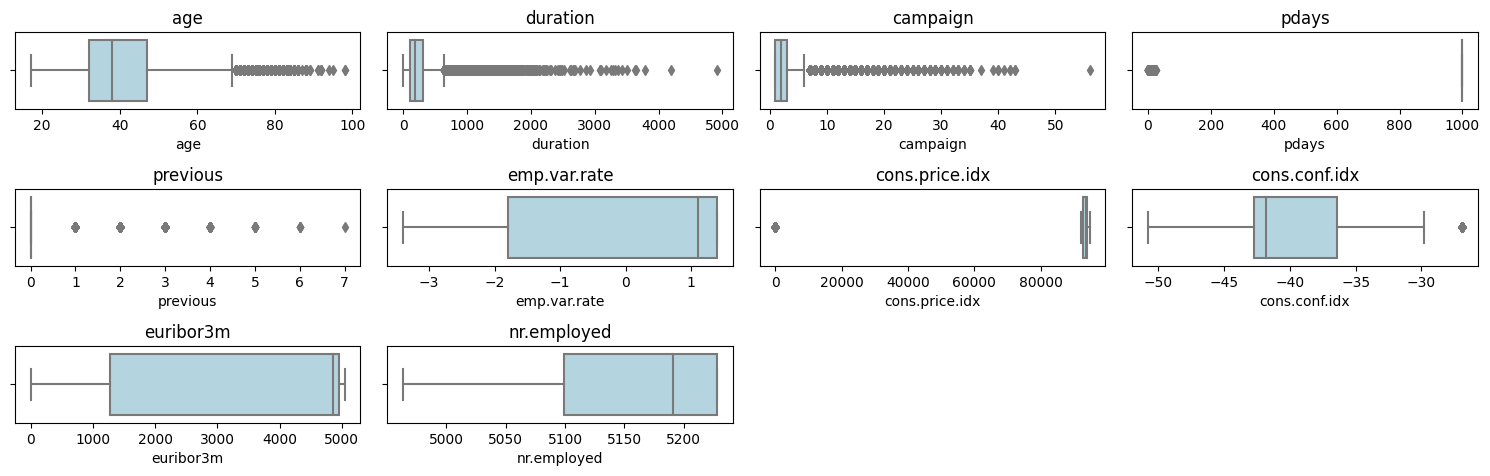

In [12]:
# Checkinging Outliers
num_features = list(df.describe().columns)
num_features.remove('deposit') # Target/ Only 1 and 0 unique


plotnumber = 1

plt.figure(figsize=(15,6))

for kolom in num_features:
    plt.subplot(4,4, plotnumber)
    sns.boxplot(data=df, x=kolom,color='lightblue')
    plt.title(kolom)
    plt.tight_layout()
    plotnumber = plotnumber + 1

- There are three numeric columns that have dozen of outliers, named "age", "duration" and "campaign". It is normal consider those three are personal data of the client that can be vary.
- For pdays, the outlier happened because there is a '999' value on that column to replace "a client that has not been contacted prior". It is considered as normal 
- Also for column previous, the outlier distribution is even, consider majority of client has not been contacted yet or has 0 value on that column. Therefore the outliers is in normal condition 
- For external factors namely cons.price.idx and cons.conf.idx are based on economic condition, therefore it should be maintain as normal circumstances.

Thus, we decided not to delete the outliers.

In [ ]:
df.to_excel('bank-additional-full-cleaned.xlsx', index=False)

---

# 3. Exploratory Data Analysis (EDA)

In [192]:
# Checking Imbalance data
df['deposit'].value_counts()/len(df)*100

0    88.733728
1    11.266272
Name: deposit, dtype: float64

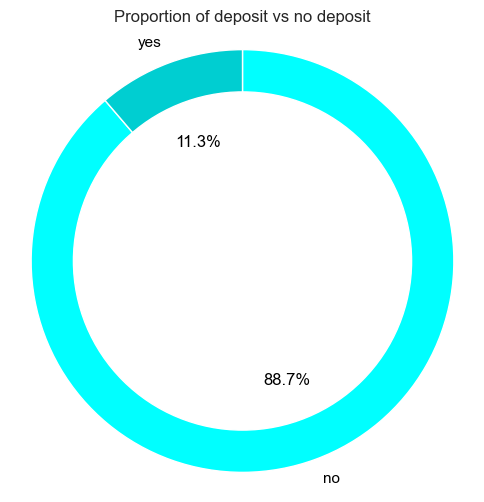

In [193]:
#Proportion between data in target column
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(df['deposit'].value_counts(), labels=['no', 'yes'], autopct='%1.1f%%', startangle=90,colors=['aqua','darkturquoise'],counterclock=False,textprops={'color':'black'})
plt.axis('equal')
fig=plt.gcf()
centre_circle = plt.Circle((0,0),0.8,fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Proportion of deposit vs no deposit')
plt.show()

There is huge gap between two uniques in target column, therefore it is necessary to include sampling method for later

In [194]:
# Excluding categorical variable
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Corellation between variable
correlation_matrix = numeric_df.corr()

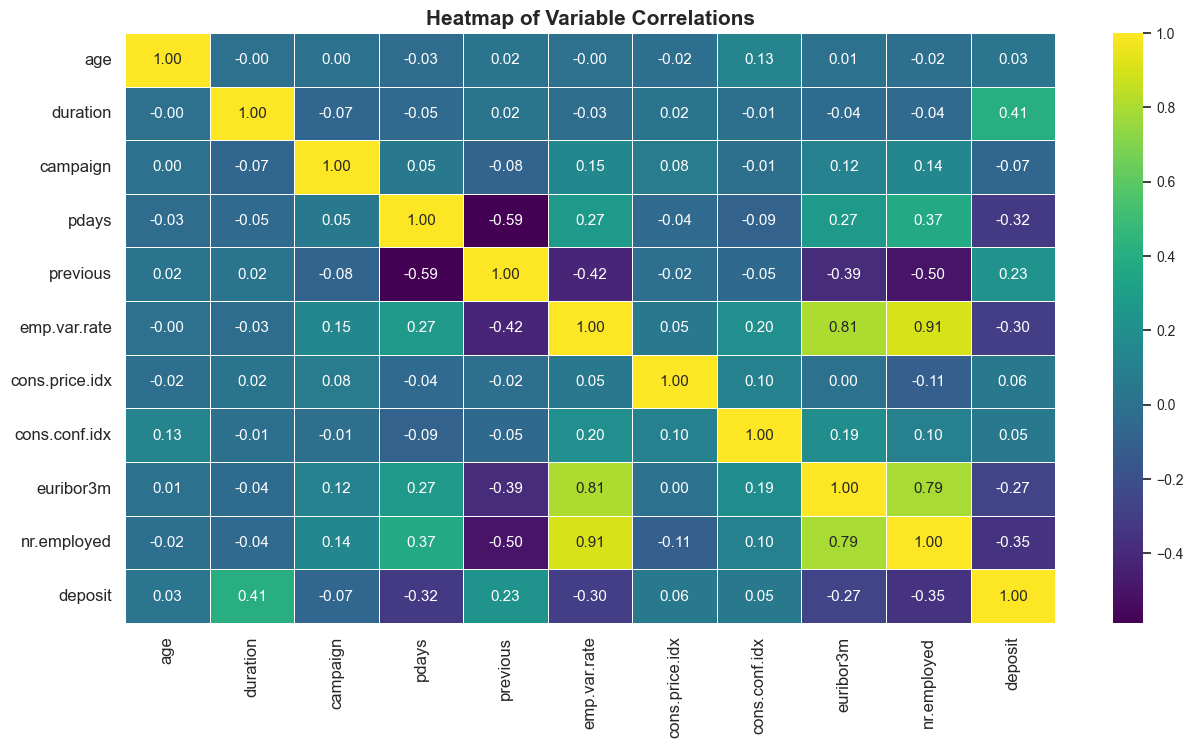

In [195]:
plt.figure(figsize=(15, 10))

# Set annot_kws to control text properties, such as font size
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, annot_kws={"size": 11})

# Set xticklabels and yticklabels to control label font size
plt.xticks(fontsize=10)  # Adjust x-axis label font size
plt.yticks(fontsize=10)  # Adjust y-axis label font size

# Set x-axis and y-axis label size
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

# Customize colorbar text size using cbar_kws
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=10)  # Adjust colorbar label font size

# Adjust space between title and heatmap
plt.subplots_adjust(top=0.7)

plt.title('Heatmap of Variable Correlations', fontweight='bold', fontsize=15)
plt.show()

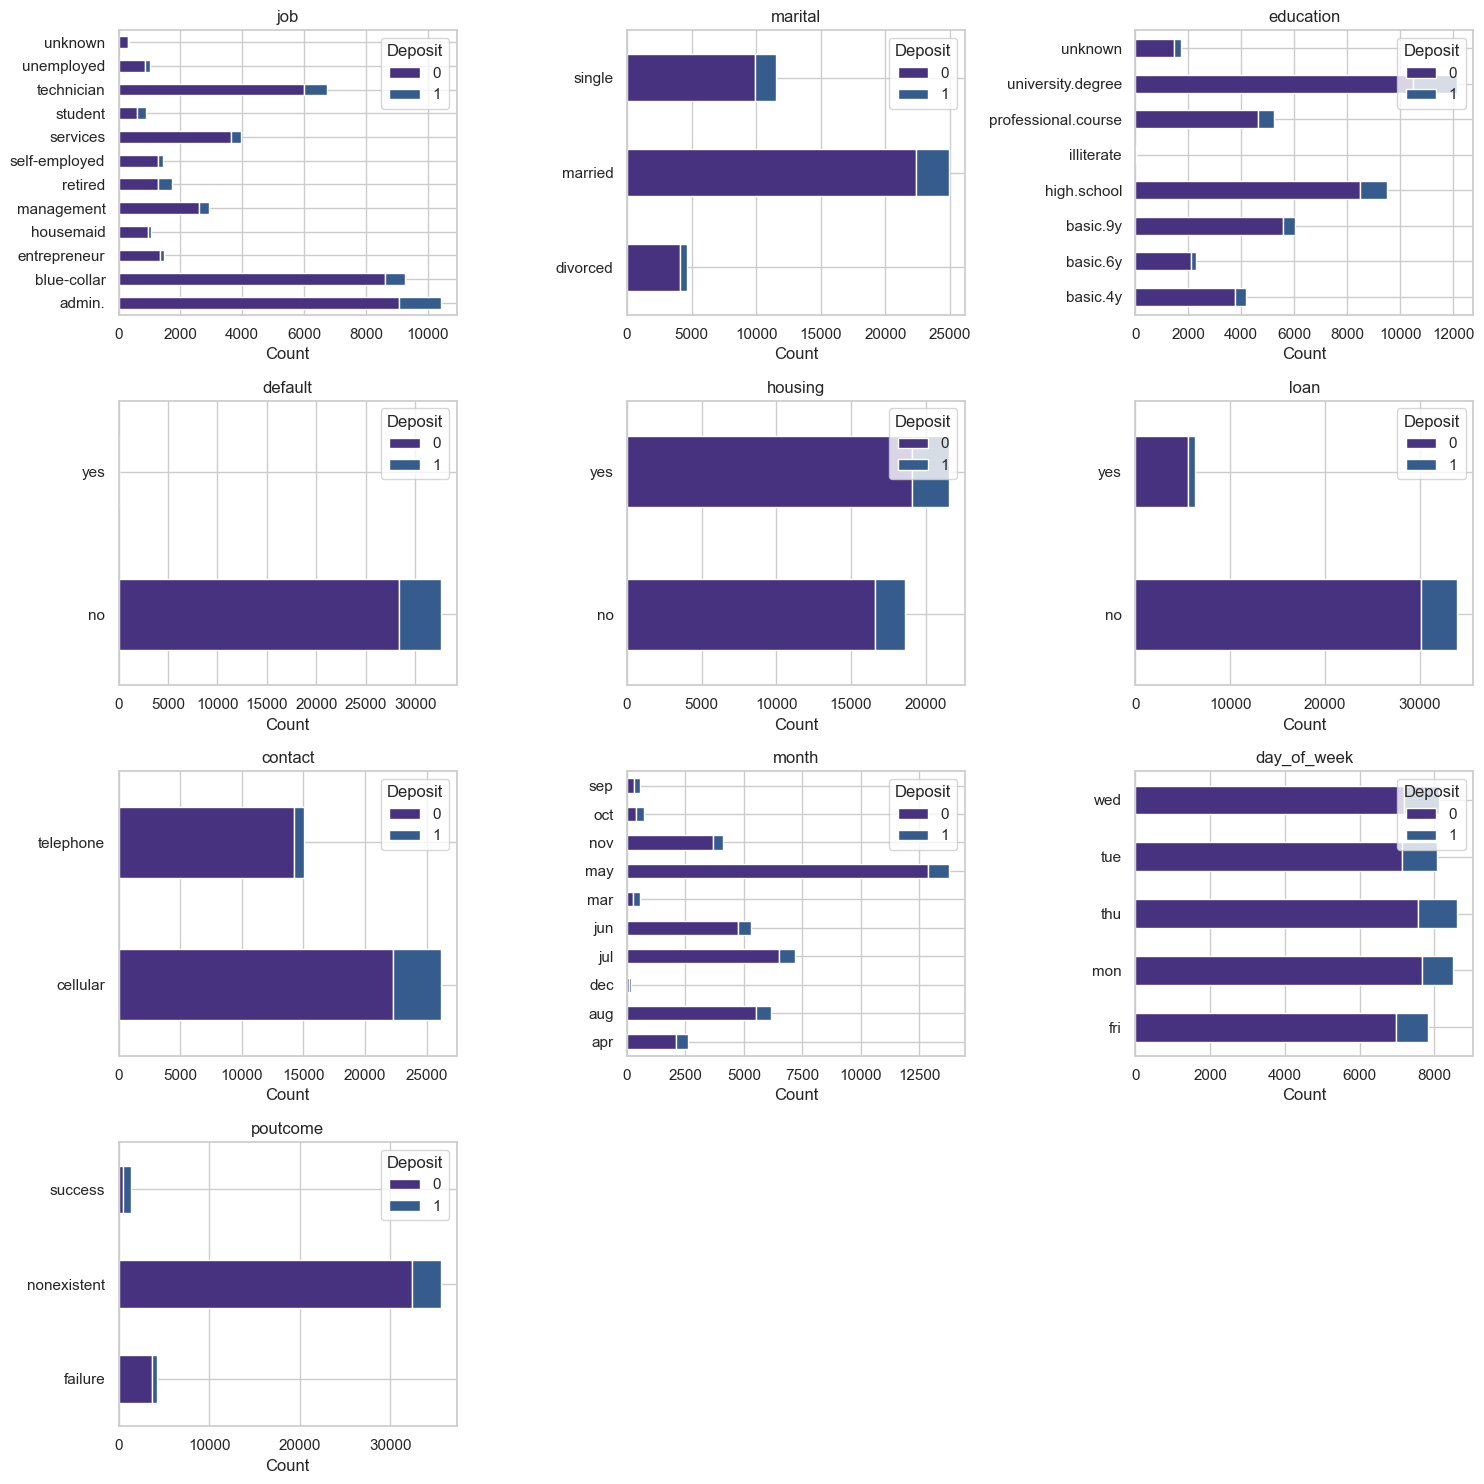

In [222]:
# Visualize the distribution of all categorical featuress
import math

# Retrieve categorical columns
categorical_col = df.select_dtypes(include=['object']).columns

# Calculate the required number of rows and columns for subplots based on the number of categorical columns
num_features = len(categorical_col)
num_cols = 3  # Number of columns for subplots
num_rows = math.ceil(num_features / num_cols)  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.ravel()
palette = sns.color_palette("viridis")

# Iterate through the categorical columns and plot
for i, column in enumerate(categorical_col):
    ax = axes[i]
    cross_tab = pd.crosstab(index=df[column], columns=df['deposit'])
    cross_tab.plot(kind='barh', stacked=True, color=palette, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Count')
    ax.set_ylabel(None)
    ax.legend(title='Deposit', loc='upper right')

# Hide any unused subplots
for j in range(num_features, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

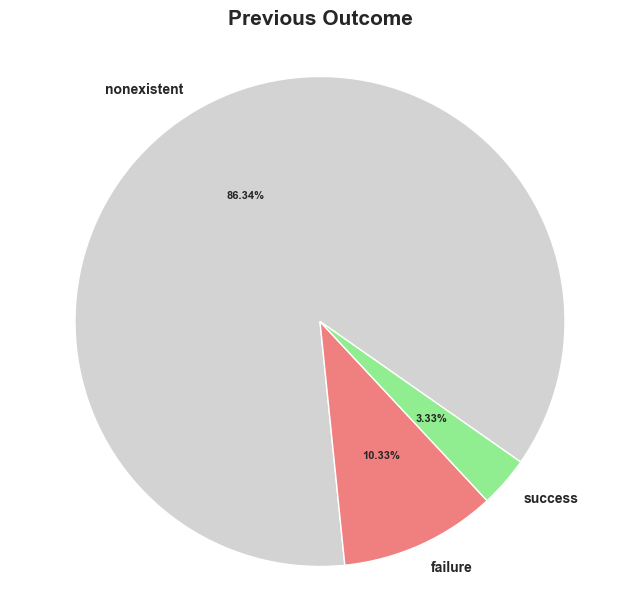

In [200]:
# Menghitung nilai count untuk setiap kategori dalam 'poutcome'
poutcome_counts = df['poutcome'].value_counts()

# Membuat subplot dengan jarak antara title dan pie chart
fig, ax = plt.subplots(figsize=(8, 7))
wedges, texts, autotexts = ax.pie(poutcome_counts, labels=poutcome_counts.index, autopct='%.2f%%', startangle=325, colors=['lightgrey', 'lightcoral', 'lightgreen'], radius=0.4)
ax.set_title('Previous Outcome', fontsize=15, pad=20, fontweight='bold')  # Menambahkan parameter fontweight pada judul

# Menjadikan label dan teks persentase dalam format bold
for text, autotext in zip(texts, autotexts):
    text.set(fontweight='bold', fontsize = 10)
    autotext.set(fontweight='bold', fontsize=8)

plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()

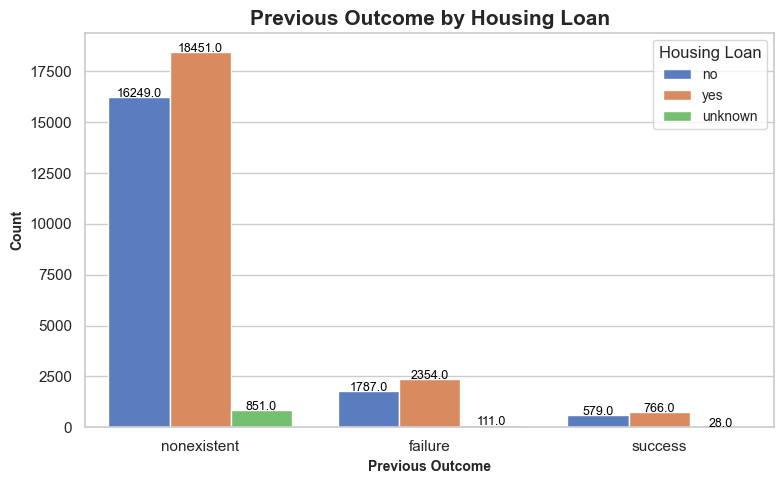

In [201]:
# Set Seaborn style for a more visually appealing plot
sns.set(style="whitegrid", palette="muted")

# Create a count plot using Seaborn
fig, ax1 = plt.subplots(figsize=(8, 5))
pohl = sns.countplot(x='poutcome', hue='housing', data=df)

# Set plot title and axis labels
plt.title('Previous Outcome by Housing Loan', fontsize=15, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.xlabel('Previous Outcome', fontsize=10, fontweight='bold')

# Add data labels on top of each bar
for p in pohl.patches:
    height = p.get_height()
    pohl.text(p.get_x() + p.get_width() / 2., height + 0.1, height, ha="center", fontsize=9, color='black')

# Adjust legend position
pohl.legend(title='Housing Loan', loc='upper right', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

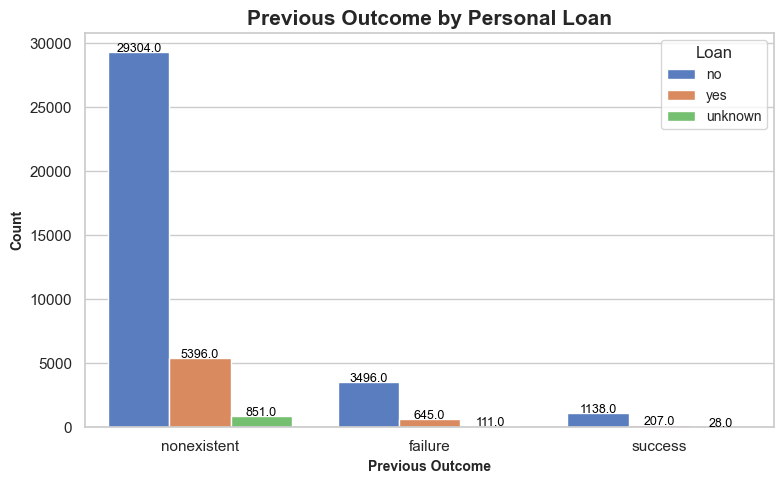

In [203]:
# Set Seaborn style for a more visually appealing plot
sns.set(style="whitegrid", palette="muted")

# Create a count plot using Seaborn
fig, ax1 = plt.subplots(figsize=(8, 5))
pohl = sns.countplot(x='poutcome', hue='loan', data=df)

# Set plot title and axis labels
plt.title('Previous Outcome by Personal Loan', fontsize=15, fontweight='bold')
plt.ylabel('Count', fontsize=10, fontweight='bold')
plt.xlabel('Previous Outcome', fontsize=10, fontweight='bold')

# Add data labels on top of each bar
for p in pohl.patches:
    height = p.get_height()
    pohl.text(p.get_x() + p.get_width() / 2., height + 0.1, height, ha="center", fontsize=9, color='black')

# Adjust legend position
pohl.legend(title='Loan', loc='upper right', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [204]:
# Filtering only the 2 columns needed
df_ct = df[['previous', 'poutcome']]

# Creating a cross table
df_ct = pd.crosstab(index=df_ct["previous"],
                  columns=df_ct["poutcome"])

df_ct

poutcome,failure,nonexistent,success
previous,,,
0,0,35551,0
1,3696,0,865
2,434,0,320
3,88,0,128
4,30,0,40
5,3,0,15
6,1,0,4
7,0,0,1


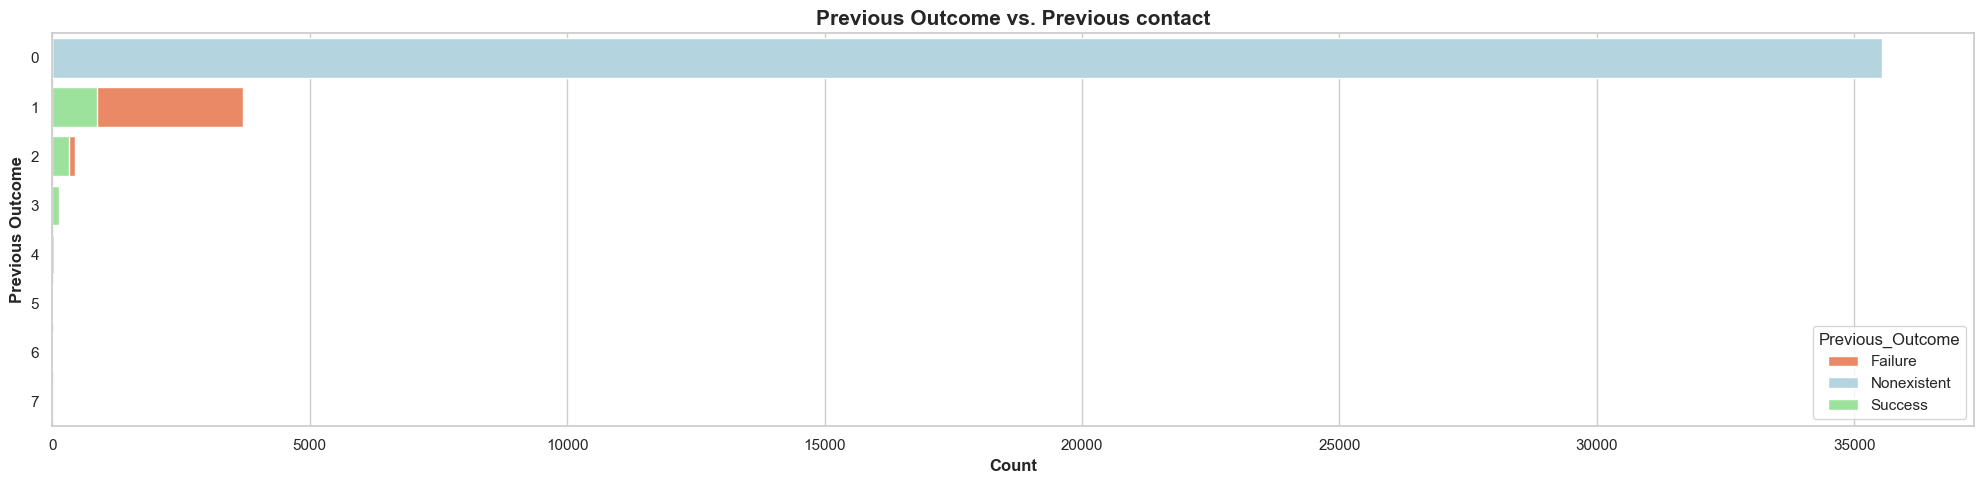

In [205]:
# Set Seaborn style for a more visually appealing plot
sns.set(style="whitegrid", palette="pastel")

# Create a stack bar chart using Seaborn
plt.figure(figsize=(20, 5))
stackbar_plot = sns.barplot(data=df_ct, y=df_ct.index, x='failure', color='coral', label='Failure', orient='h')
stackbar_plot = sns.barplot(data=df_ct, y=df_ct.index, x='nonexistent', color='lightblue', label='Nonexistent', orient='h')
stackbar_plot = sns.barplot(data=df_ct, y=df_ct.index, x='success', color='lightgreen', label='Success', orient='h')

# Set plot title and axis labels
plt.title('Previous Outcome vs. Previous contact', fontsize=15, fontweight='bold')
plt.xlabel('Count', fontweight='bold')
plt.ylabel('Previous Outcome', fontweight='bold')

# Add legend
plt.legend(title='Previous_Outcome', loc='lower right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

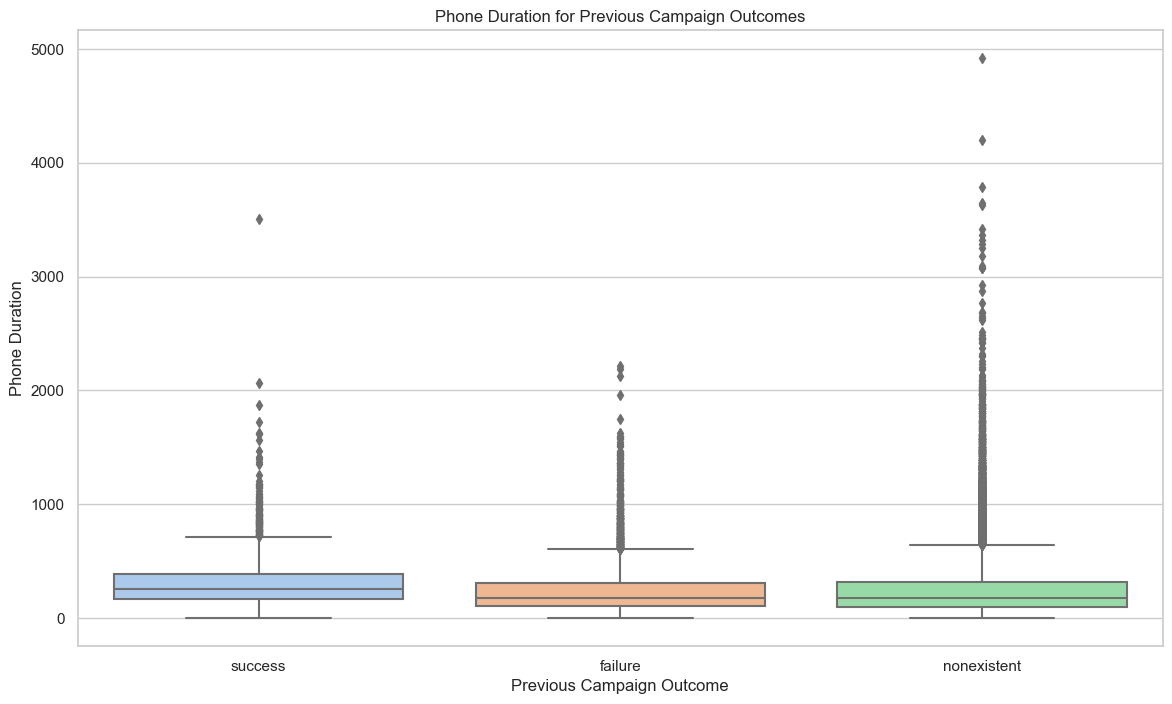

In [223]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='poutcome', y='duration', data=df, order=['success', 'failure', 'nonexistent'])
plt.title('Phone Duration for Previous Campaign Outcomes')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Phone Duration')
plt.show()

In [224]:
cross_table_campaign = pd.crosstab(df['campaign'], df['poutcome'])

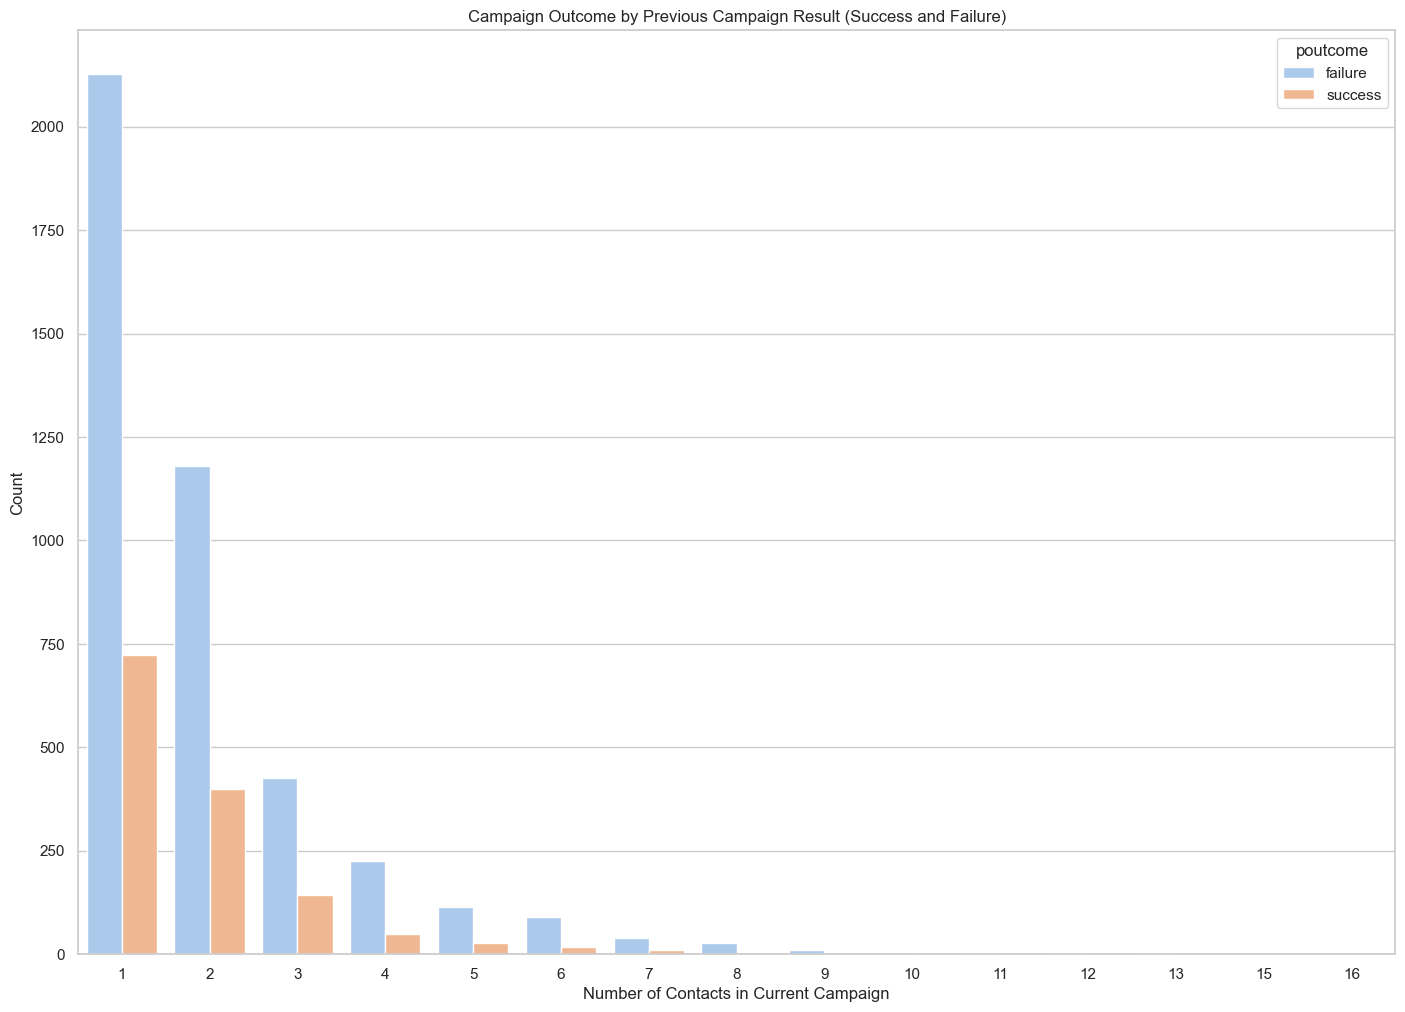

In [228]:
filtered_df = df[df['poutcome'].isin(['failure', 'success'])]

plt.figure(figsize=(17, 12))
sns.countplot(x='campaign', hue='poutcome', data=filtered_df)
plt.title('Campaign Outcome by Previous Campaign Result (Success and Failure)')
plt.xlabel('Number of Contacts in Current Campaign')
plt.ylabel('Count')
plt.show()

---

# 4. Data Preprocessing

In [214]:

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
import category_encoders as ce
from category_encoders import OrdinalEncoder

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate, StratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier



# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss


In [215]:
#remove unknown as NAN
df['marital'] = df['marital'].replace('unknown', np.nan)
df['housing'] = df['housing'].replace('unknown', np.nan)
df['loan'] = df['loan'].replace('unknown', np.nan)
df['default'] = df['default'].replace('unknown', np.nan)

In [216]:
# Feature dan Target
X = df.drop(columns=['deposit'])
y = df['deposit']

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

In [218]:
numeric_transformer = Pipeline([
    ('scaler', RobustScaler())
])
unkown_imputer_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

ordinal_mapping = [
    {'col':'education', 'mapping':{'illiterate':1, 'basic.4y':2, 'basic.6y':3, 'basic.9y':4, 'high.school':5, 'professional.course':6, 'university.degree':7}}
]


categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(drop='first')),
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Melakukan transformasi
transformer = ColumnTransformer([
    ('ordinal', OrdinalEncoder(cols=['education'], mapping=ordinal_mapping), ['education']),
    ('numeric', numeric_transformer, ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',]),
    ('categorical', categorical_transformer, ['job', 'marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])
], remainder='passthrough')


In [219]:
transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinal',
                                 OrdinalEncoder(cols=['education'],
                                                mapping=[{'col': 'education',
                                                          'data_type': dtype('O'),
                                                          'mapping': illiterate             1
basic.4y               2
basic.6y               3
basic.9y               4
high.school            5
professional.course    6
university.degree      7
dtype: int64}]),
                                 ['education']),
                                ('numeric',
                                 Pipeline(steps=[('scaler', RobustScaler())]),
                                 ['age', 'campaign', 'pdays', 'previous',
                                  'emp.var.rate', 'cons.price.idx',
                                  'cons.conf.idx', 'euribor3m',
                                  'nr.employed']),
                                ('categorical',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='first')),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['job', 'marital', 'education', 'default',
                                  'housing', 'loan', 'contact', 'month',
                                  'day_of_week', 'poutcome'])])